# 1. Algoritmos de Ordenação
## 1.1. Merge sort

O algoritmo de ordenação por Merge sort é baseado na metodologia de **divisão e conquista**, em que o problema principal é dividido em subproblemas que são resolvidos e, posteriormente, agrupados com o intuito de gerar a solução final. O algoritmo abaixo implementa a técnica Merge sort, e a Figura 1 apresenta uma análise do custo computacional para a ordenação de vetores com diferentes tamanhos.

In [2]:
from matplotlib import pyplot
import numpy
import math
import timeit
import queue
import sys

In [3]:
def MergeSort(A, e, d):
    if (d > e):
        m = math.floor((e+d)/2) #Divisão é realizada em theta(1)
        MergeSort(A, e, m)
        MergeSort(A, m+1, d)
        
        B = numpy.zeros(d+1);
        
        # Conquista é realizada em theta(n)
        
        for k in range(0, m+1):
            B[k] = A[k]
        
        j = d
        for k in range(m+1, d+1):
            B[j] = A[k]
            j = j-1
        
        i = e
        j = d
        for k in range(e, d+1):
            if(B[i] < B[j]):
                A[k] = B[i]
                i = i+1
            else:
                A[k] = B[j]
                j = j-1

Sorting ... 


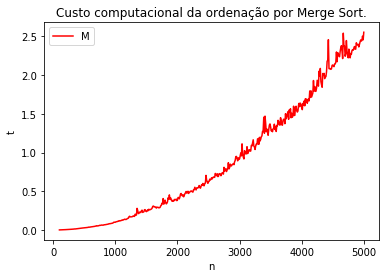

In [5]:
q1 = queue.Queue()
q2 = queue.Queue()

print("Sorting ... ")

for n in range(100,5001, 10):
    
    A = numpy.random.randint(-20, 20, n) #gera vetor com números inteiros aleatórios

    start = timeit.default_timer()
    MergeSort(A, 0, n-1)
    stop = timeit.default_timer()
    execution_time = stop - start
    
    q1.put(execution_time)
    q2.put(n)

y = numpy.zeros(q1.qsize())
i = 0
while not q1.empty():
    y[i] = q1.get();
    i = i+1;

x = numpy.zeros(q2.qsize())
i = 0
while not q2.empty():
    x[i] = q2.get();
    i = i+1;

# plotando o gráfico
pyplot.plot(x,y, color = "red")
pyplot.xlabel("n")
pyplot.ylabel("t")
pyplot.title("Custo computacional da ordenação por Merge Sort.")
pyplot.show()